In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
temp = pd.read_csv('./data.csv',index_col=0)

In [17]:
y = pd.read_csv('./label.csv',index_col=0)

In [18]:
y.shape,temp.shape

((686654, 1), (886654, 46))

In [19]:
# 数据切分
train_data = temp[:-200000]
test_data = temp[-200000:]

# 图形展示

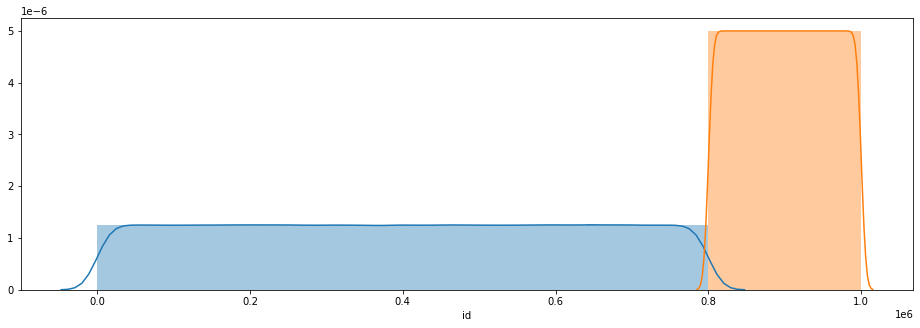

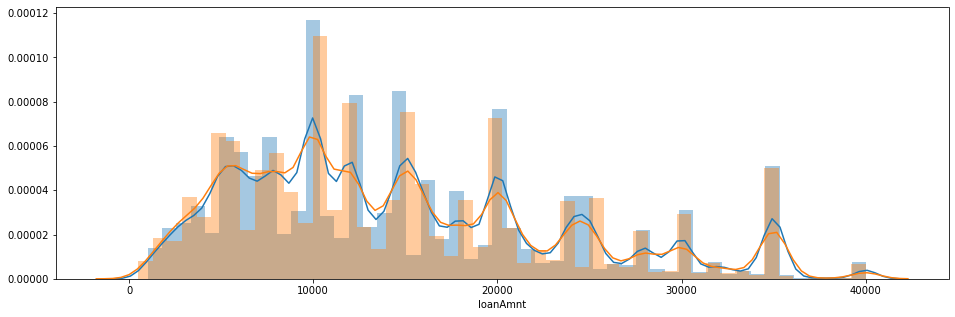

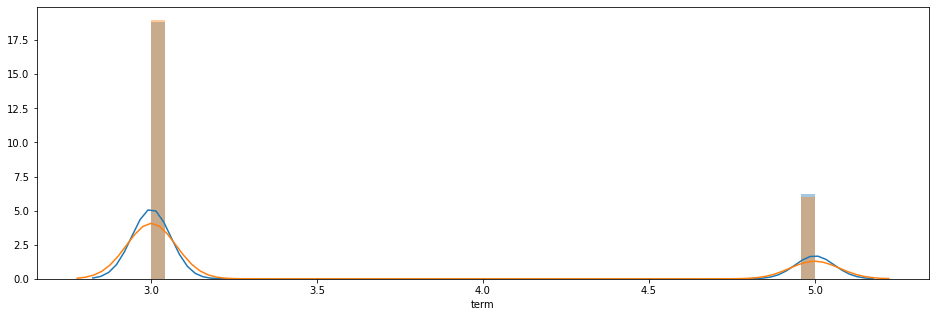

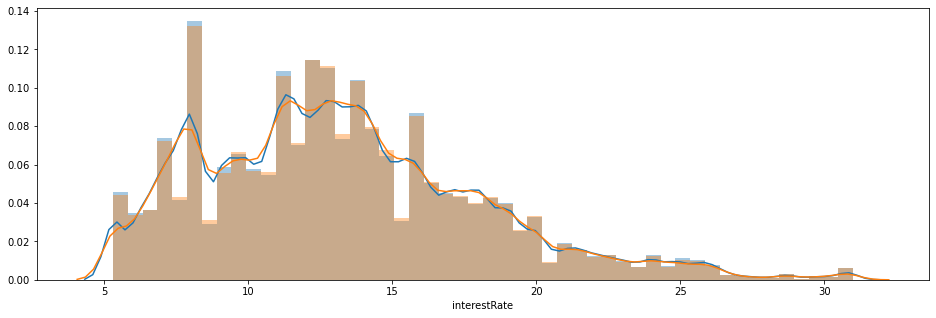

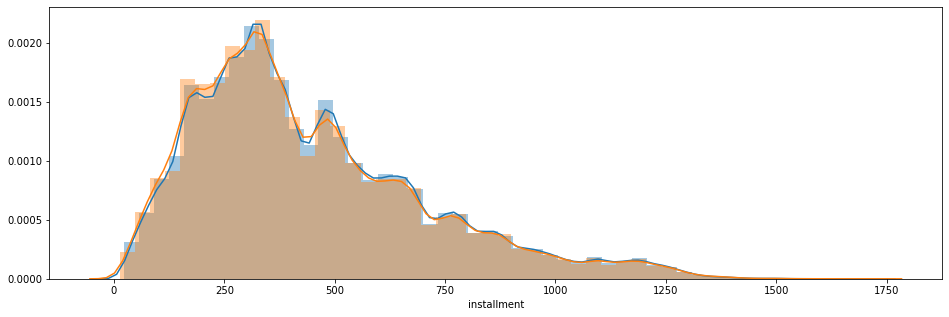

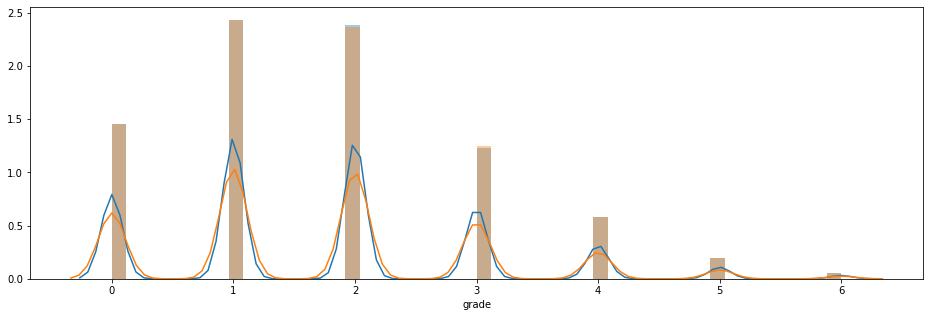

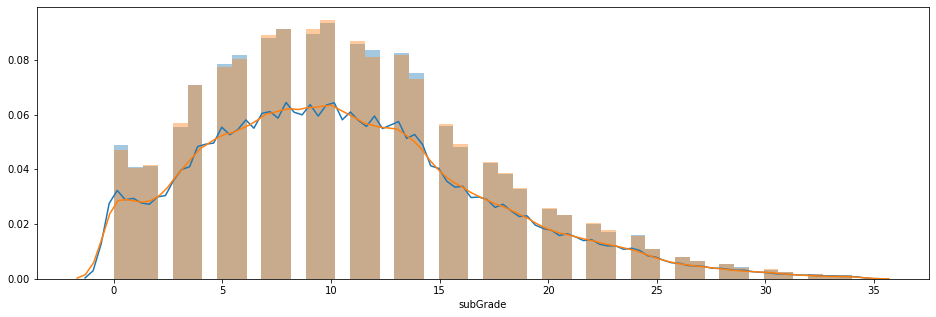

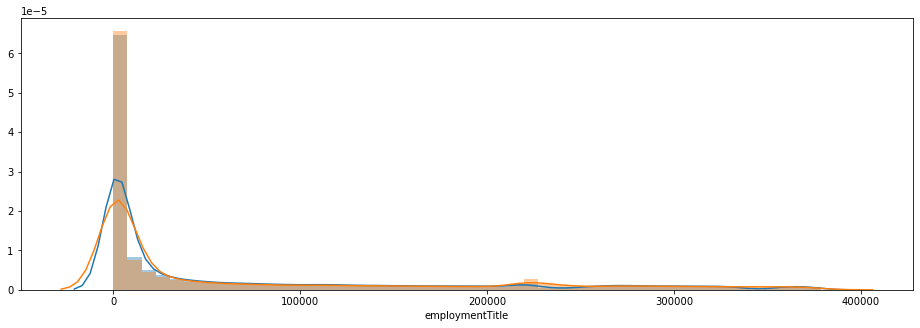

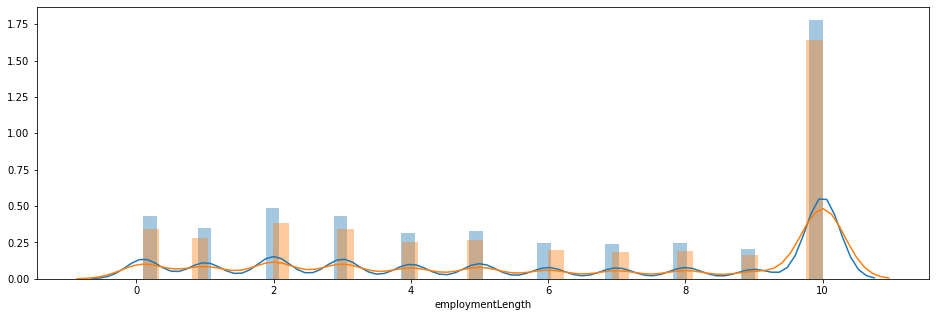

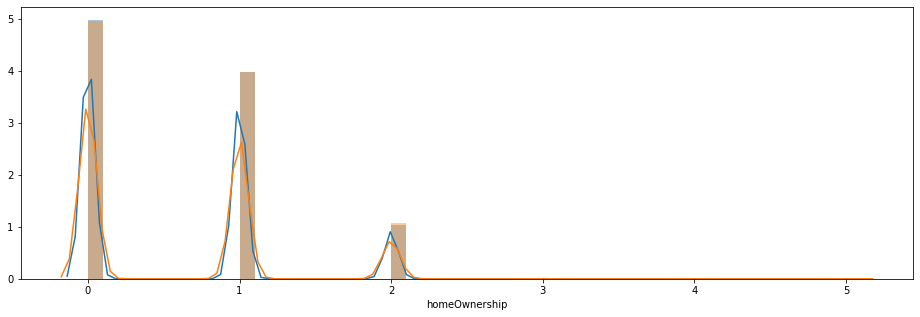

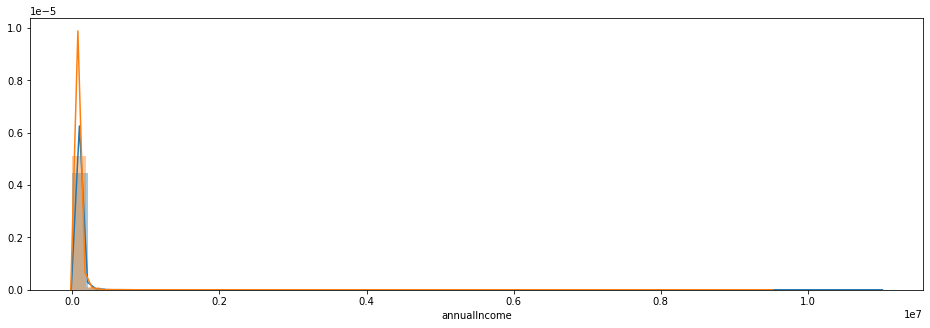

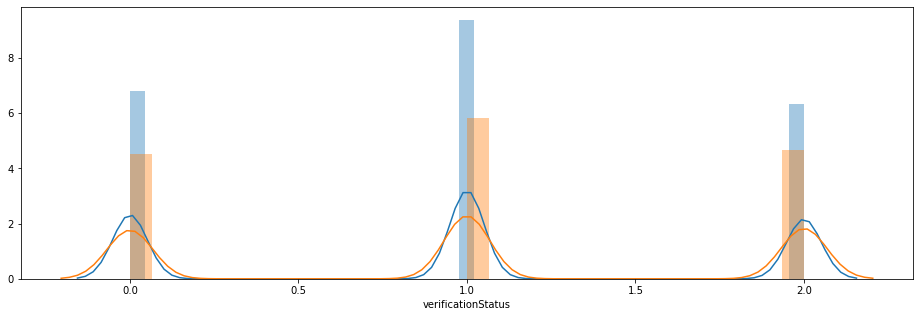

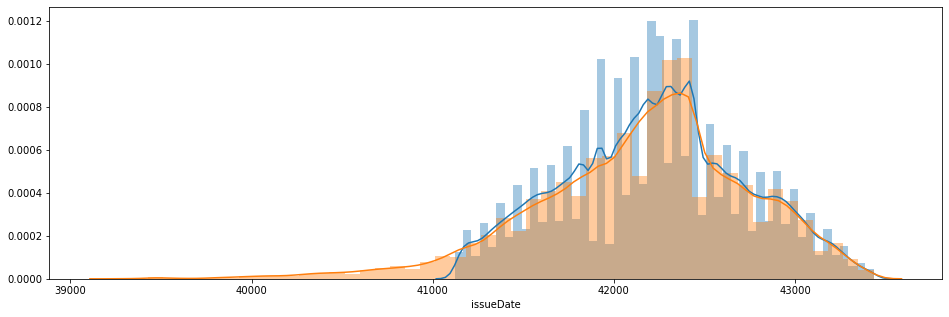

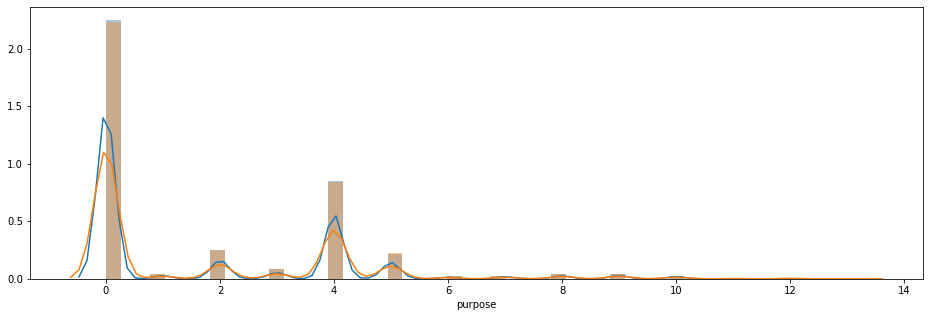

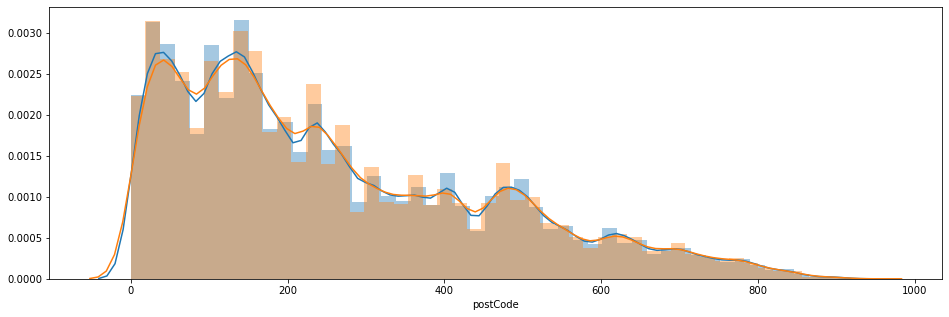

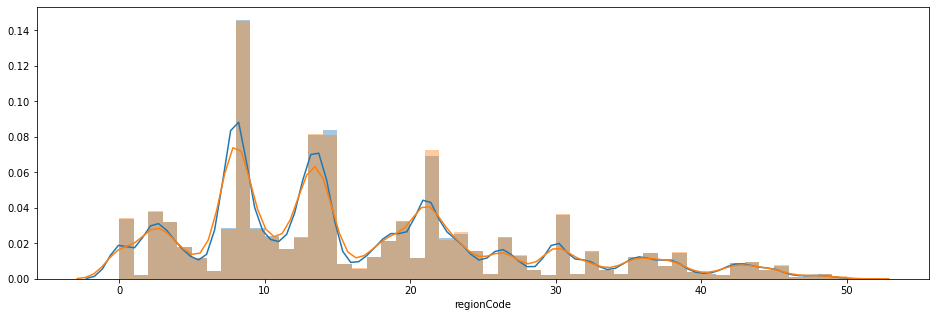

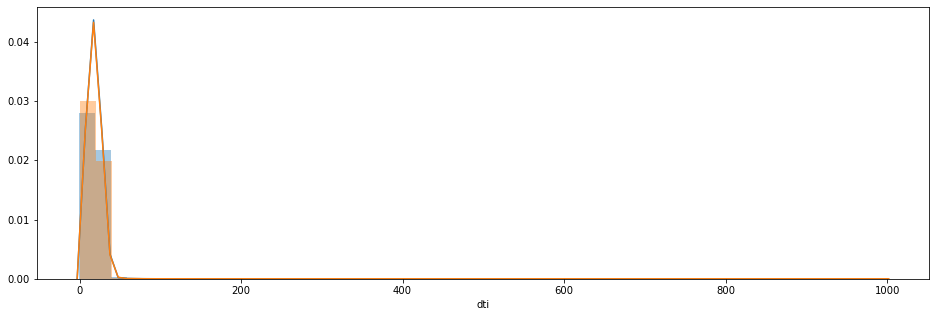

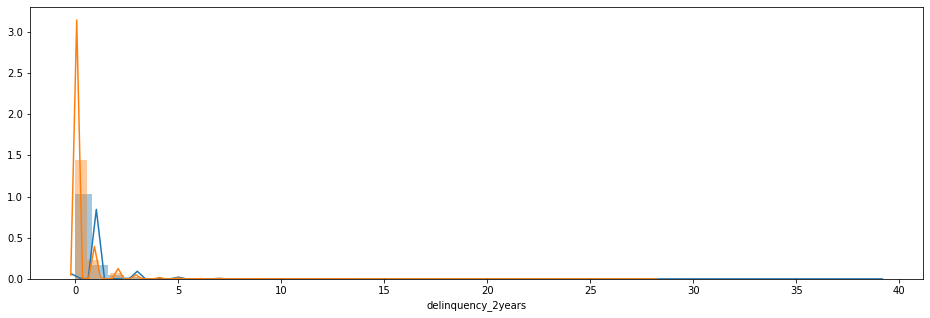

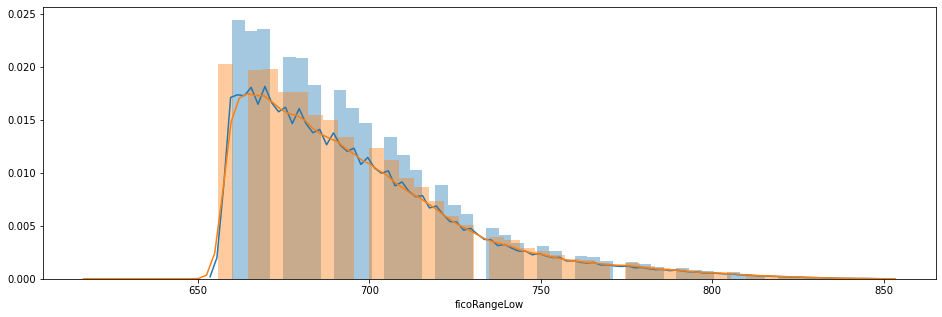

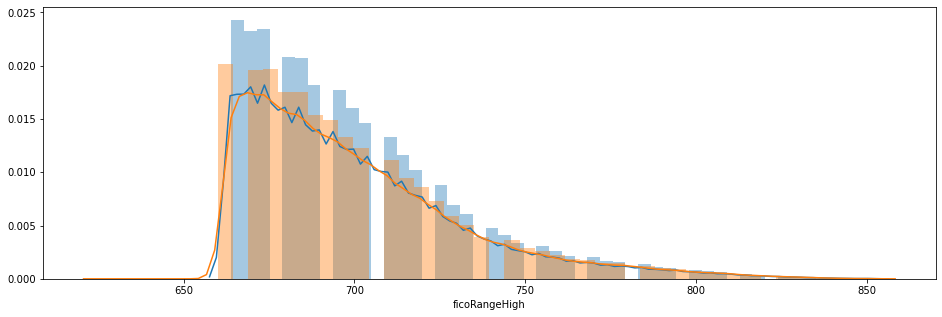

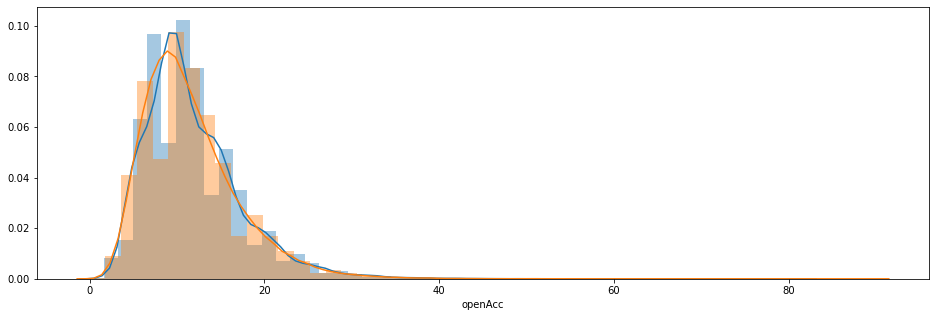

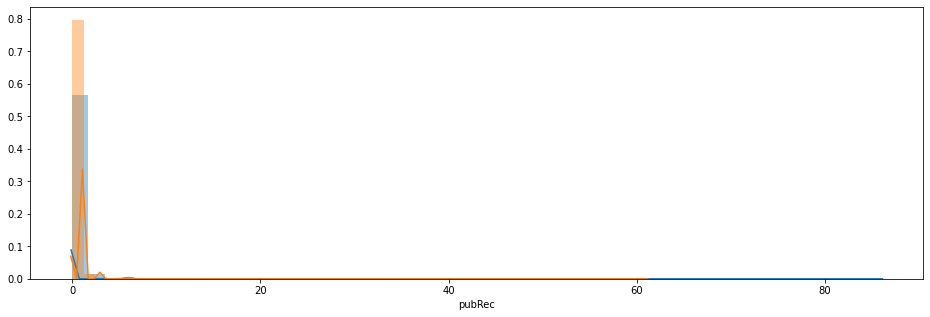

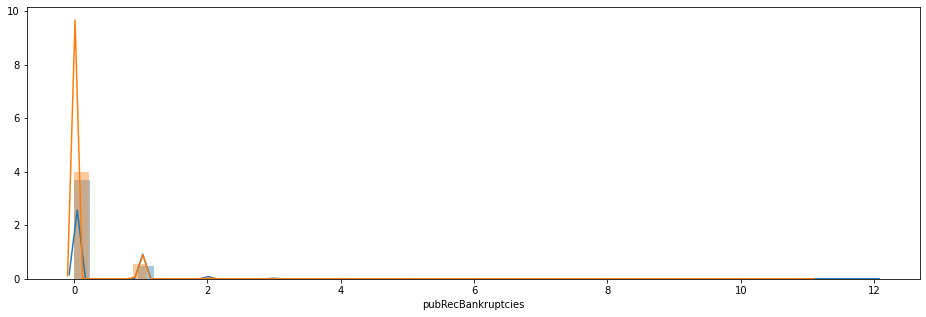

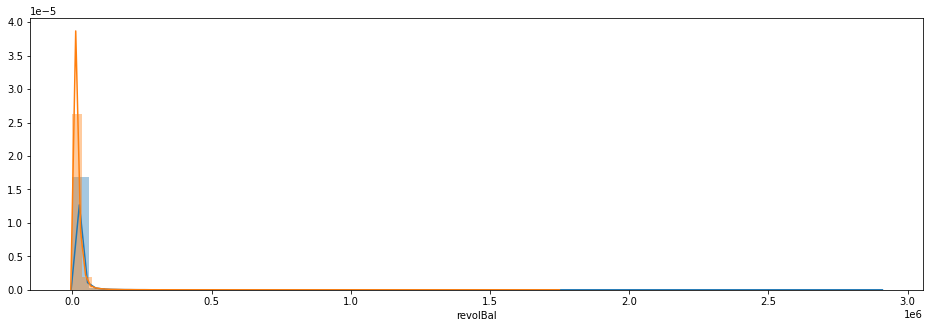

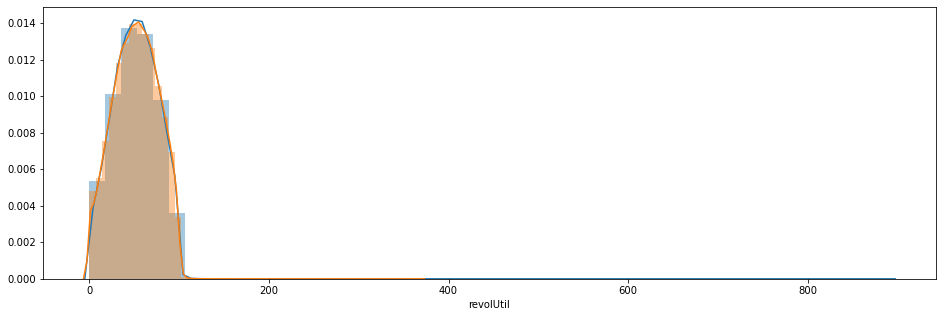

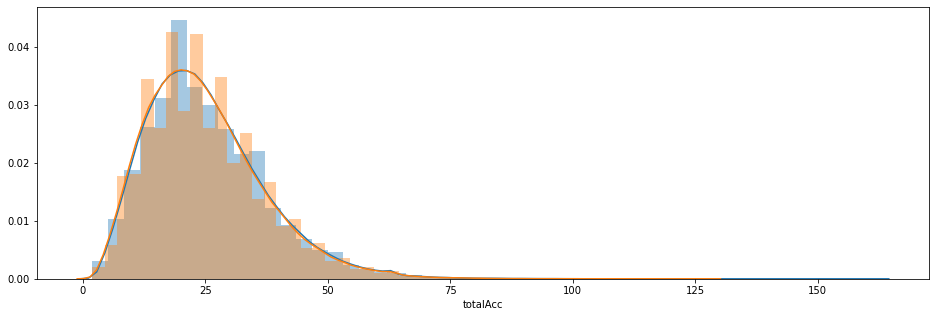

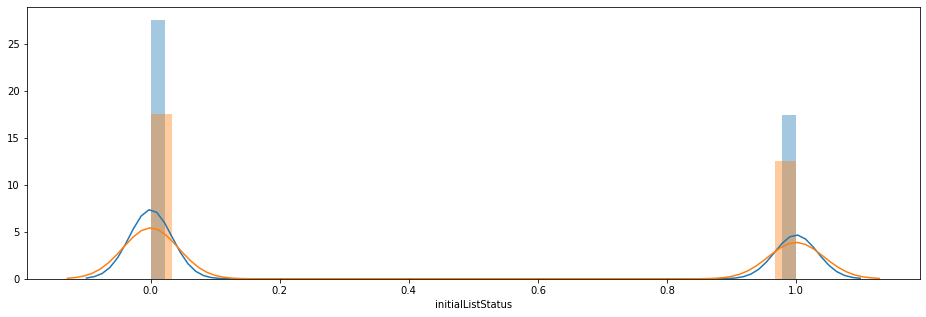

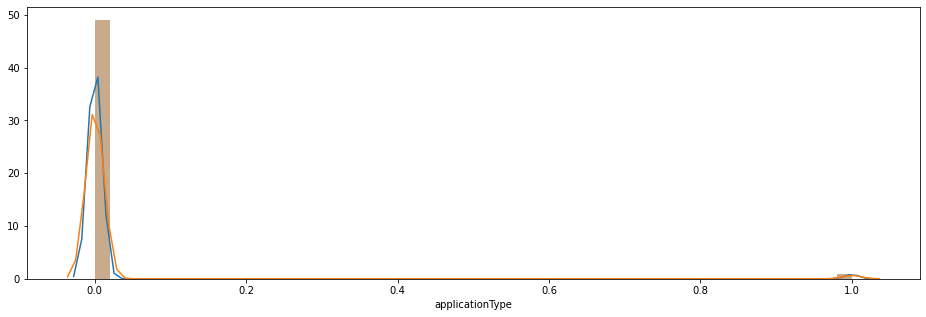

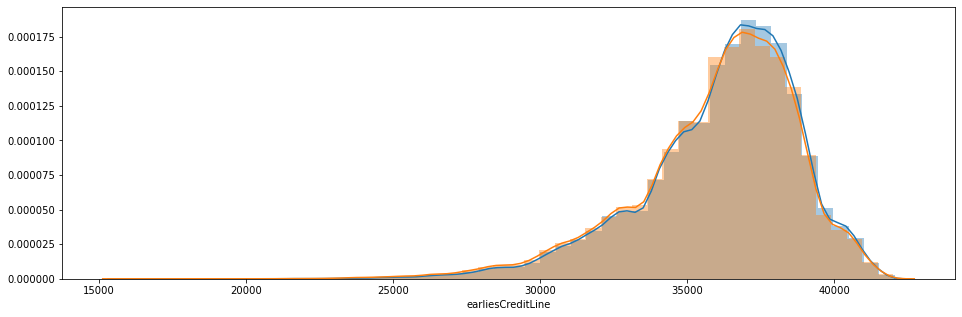

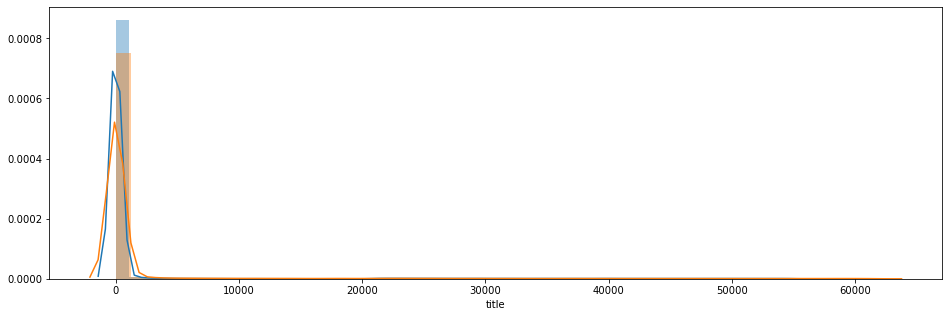

D:\Python\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


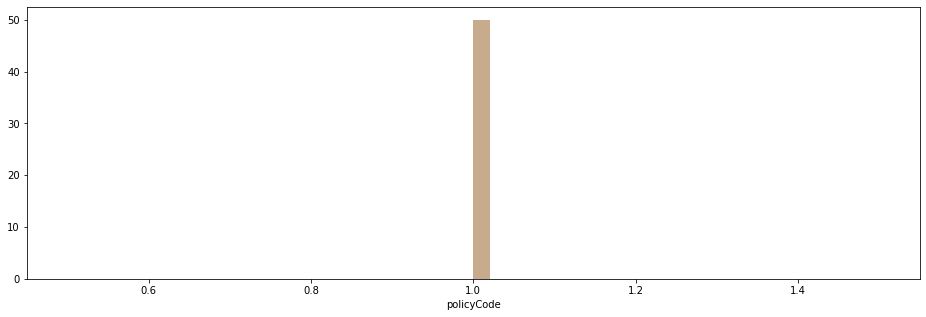

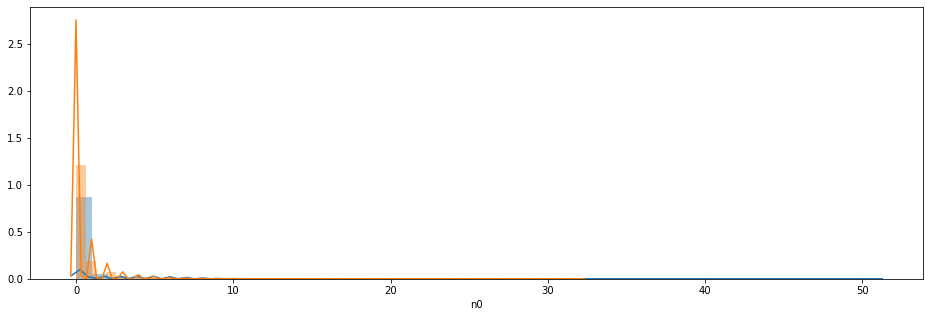

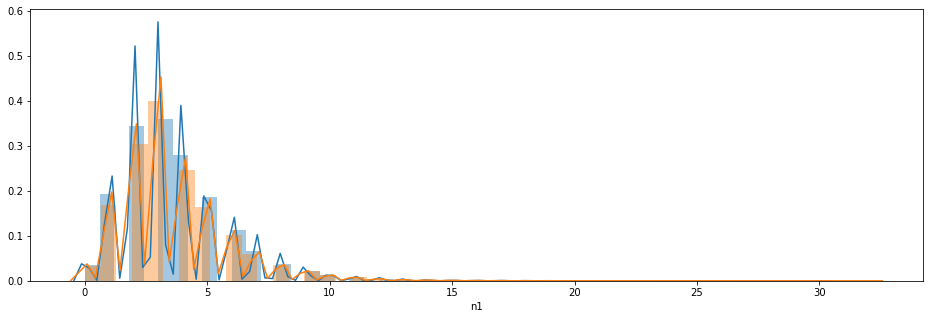

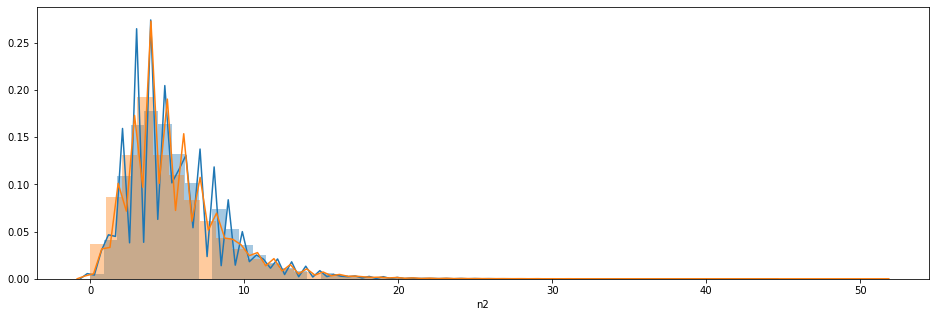

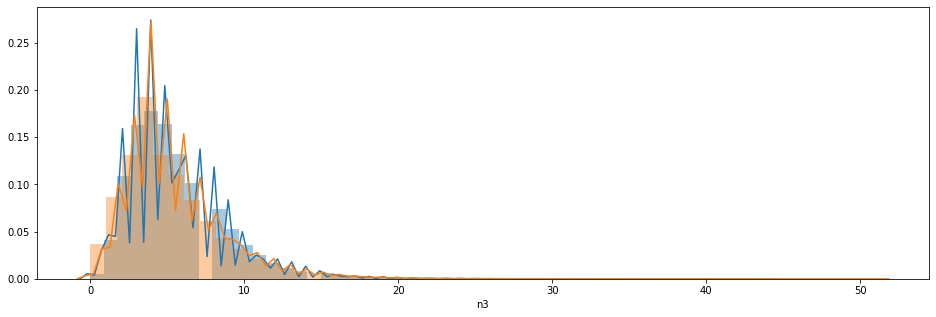

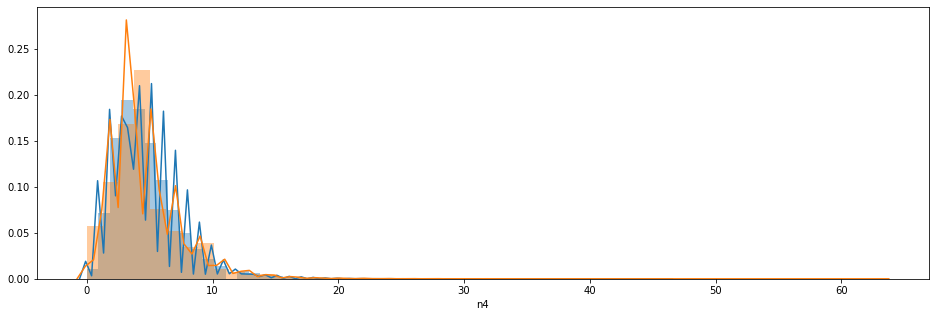

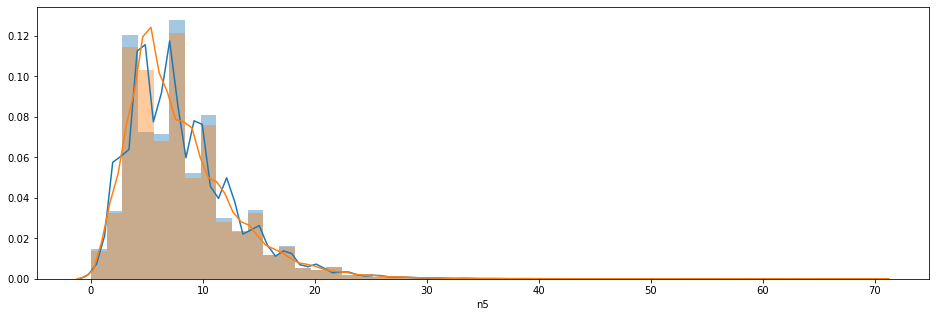

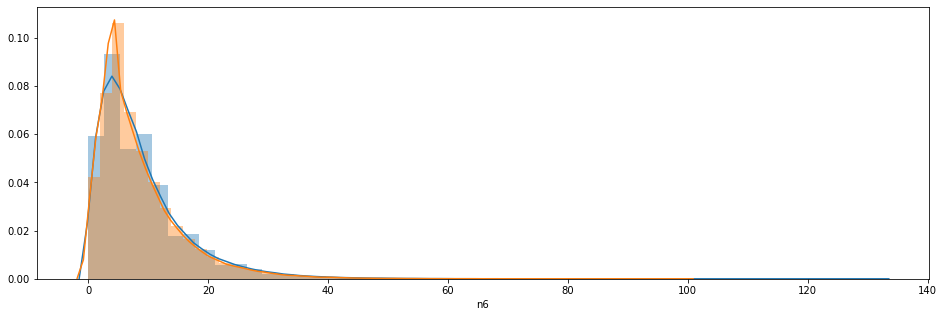

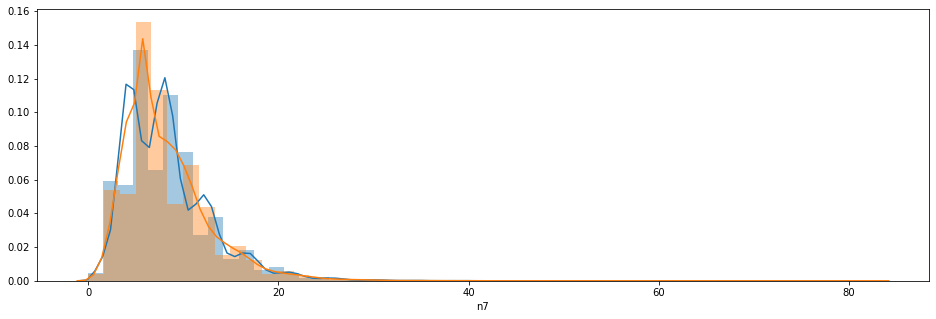

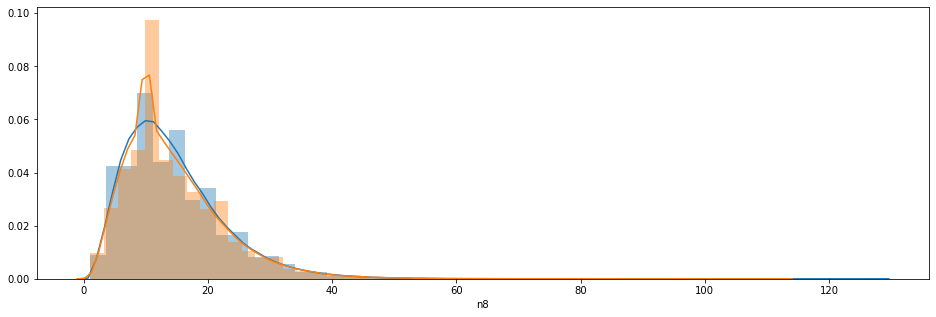

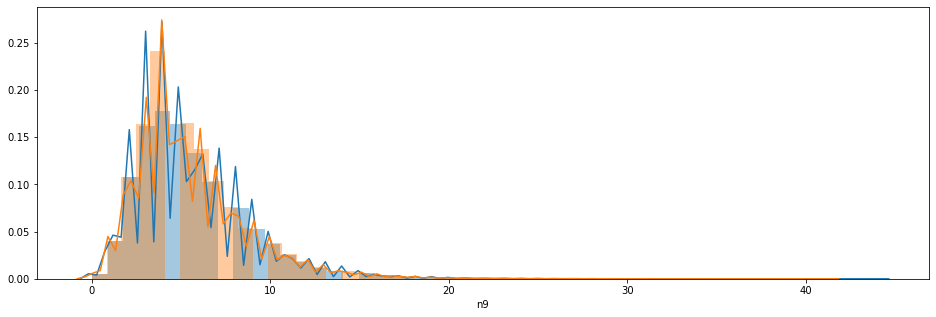

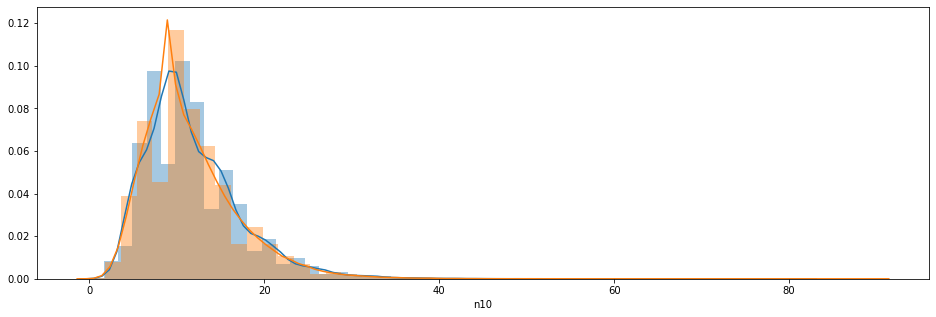

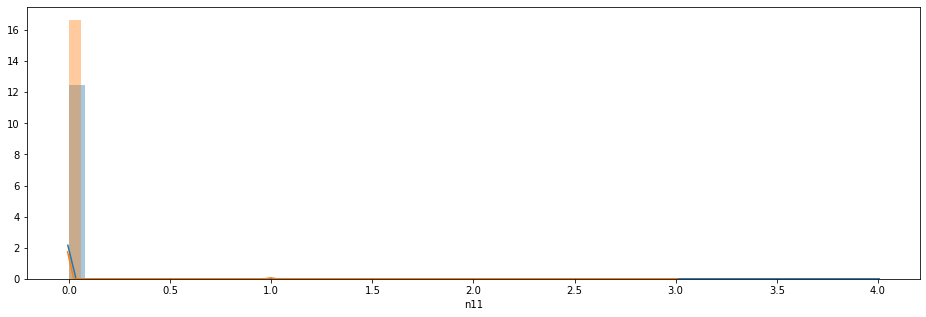

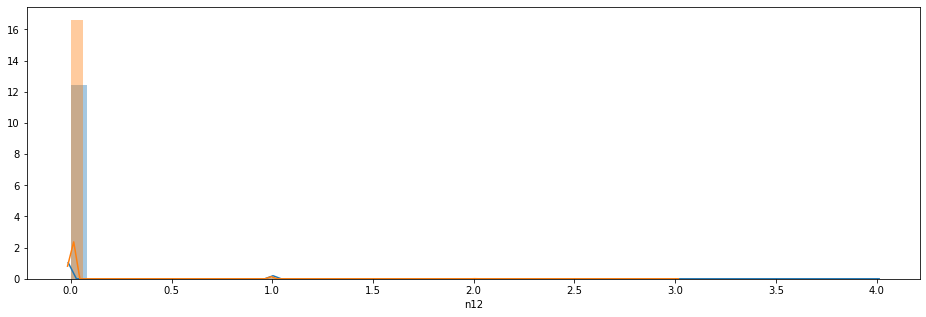

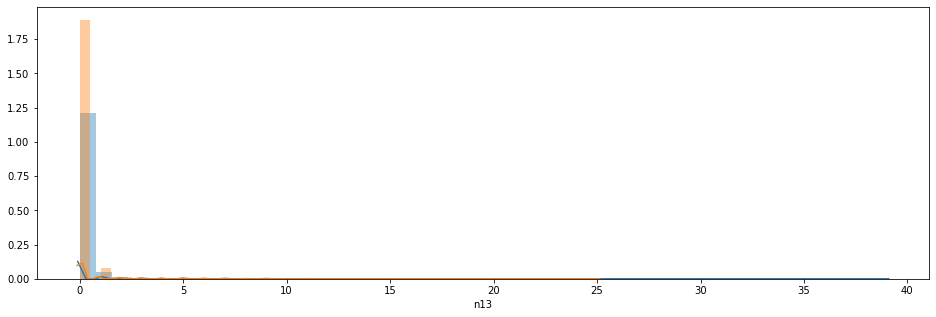

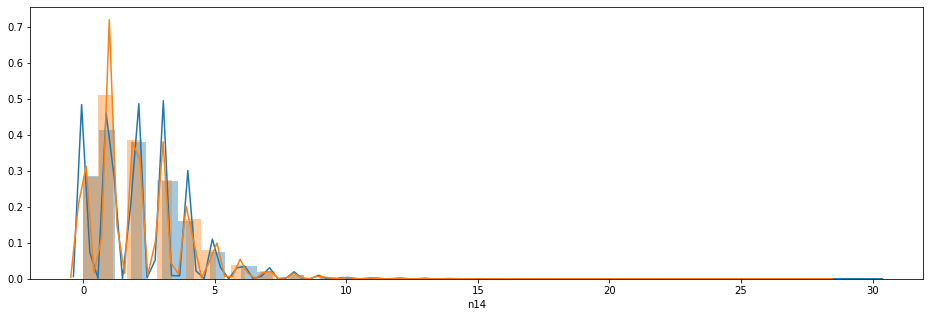

In [20]:
# 分布图
for i in range(len(train_data.columns)):
    plt.figure(figsize=(16, 5))
    ax = sns.distplot(train_data.iloc[:,i])
    ax2 = sns.distplot(test_data.iloc[:,i])
    plt.show()

In [21]:
del train_data['id']
del test_data['id']

# 分割验证集

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.03, random_state=42)

# 训练模型

In [ ]:
# 归一化
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(x)
#x_train = scaler.transform(x)
#x_train = x

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(n_estimators=30,max_depth=30)

In [52]:
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=30, n_estimators=30)

In [53]:
preds = clf.predict_proba(X_test)
preds

array([[0.8138665 , 0.1861335 ],
       [0.99813085, 0.00186915],
       [0.77179487, 0.22820513],
       ...,
       [0.88652459, 0.11347541],
       [0.44133333, 0.55866667],
       [0.95441816, 0.04558184]])

In [54]:
score = metrics.roc_auc_score(y_test.values.ravel(), preds[:,1])
score

0.7009027384837772

In [55]:
result = clf.predict_proba(test_data)
result[:,1]
np.savetxt('ft2.txt',result[:,1])

# 神经网络

In [56]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
from torch.nn import functional as F
from torch import optim

In [57]:

class DiabetesDataset(Dataset):
    def __init__(self, x_, y_):
        self.len = x_.shape[0]
        self.x_data = torch.from_numpy(x_)
        # 这部很关键， 特征类型要求float类型
        self.x_data = self.x_data.float()

        self.y_data = torch.from_numpy(y_)
        self.y_data = self.y_data.float()


    def __getitem__(self, item):
        return self.x_data[item], self.y_data[item]

    def __len__(self):
        return self.len

In [59]:
dataset = DiabetesDataset(X_train.values, y_train.values)
train_loader = DataLoader(dataset=dataset, batch_size=512, shuffle=True)

In [62]:
#网络结构
class NeuralNet(nn.Module):
    def __init__(self, input_size_, hidden_size_, hidden_size2_,num_classes_):
        super().__init__()
        self.fc1 = nn.Linear(input_size_, hidden_size_) 
        self.fc2 = nn.Linear(hidden_size_, hidden_size2_)  
        self.fc3 = nn.Linear(hidden_size2_, num_classes_)
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        #二分类最后一步进行sigmoid
        out = torch.sigmoid(out)
        return out

In [69]:
model = NeuralNet(45,16,8,1)
#损失函数
criterion = nn.BCELoss(reduction='mean')
#优化算法
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [70]:
total_step = len(train_loader)
num_epochs = 10
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        x = x.reshape(-1, 45)
        # Forward pass
        outputs = model(x)
        loss = criterion(outputs, y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #输出中间信息
        if i % 100 == 0 and epoch%1==0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/10], Step [1/1301], Loss: 45.8635
Epoch [1/10], Step [101/1301], Loss: 19.1406
Epoch [1/10], Step [201/1301], Loss: 16.4062
Epoch [1/10], Step [301/1301], Loss: 19.5312
Epoch [1/10], Step [401/1301], Loss: 17.3828
Epoch [1/10], Step [501/1301], Loss: 23.4375
Epoch [1/10], Step [601/1301], Loss: 19.9219
Epoch [1/10], Step [701/1301], Loss: 16.0156
Epoch [1/10], Step [801/1301], Loss: 22.0703
Epoch [1/10], Step [901/1301], Loss: 20.8984
Epoch [1/10], Step [1001/1301], Loss: 18.1641
Epoch [1/10], Step [1101/1301], Loss: 19.3359
Epoch [1/10], Step [1201/1301], Loss: 23.2422
Epoch [1/10], Step [1301/1301], Loss: 18.7225
Epoch [2/10], Step [1/1301], Loss: 20.1172
Epoch [2/10], Step [101/1301], Loss: 18.5547
Epoch [2/10], Step [201/1301], Loss: 18.9453
Epoch [2/10], Step [301/1301], Loss: 17.1875
Epoch [2/10], Step [401/1301], Loss: 19.3359
Epoch [2/10], Step [501/1301], Loss: 17.3828
Epoch [2/10], Step [601/1301], Loss: 20.1172
Epoch [2/10], Step [701/1301], Loss: 19.9219
Epoch [2/1

KeyboardInterrupt: 

In [65]:
len(train_loader)

1301